In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from arabic_reshaper import reshape
from bidi.algorithm import get_display

from sklearn.linear_model import Ridge,LinearRegression
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("DataSet/houses.csv",index_col=0)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7182 entries, 0 to 7181
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                7141 non-null   float64
 1   bedrooms             7158 non-null   float64
 2   year_constructed     6996 non-null   float64
 3   area                 7172 non-null   float64
 4   city                 7182 non-null   object 
 5   neighbourhood        6756 non-null   object 
 6   latitude             7182 non-null   float64
 7   longitude            7182 non-null   float64
 8   elevator             2591 non-null   object 
 9   storeHouse           2958 non-null   object 
 10  balcony              420 non-null    object 
 11  janitor              156 non-null    object 
 12  conferenceHall       81 non-null     object 
 13  parking              2836 non-null   float64
 14  floor                3078 non-null   float64
 15  security             95 non-null     o

,price,bedrooms,year_constructed,area,city,neighbourhood,latitude,longitude,elevator,storeHouse,...,centralVacumCleaner,sauna,pool,jacuzzi,toiletI,toiletF,lighting,fountain,gym,alachiq
0,7.950000e+09,2.0,1395.0,97.0,تهران,جنت آباد جنوبی,35.747696,51.303749,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,1381.0,46.0,تهران,آذربایجان,35.693600,51.396595,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,1381.0,46.0,تهران,آذربایجان,35.693600,51.396595,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,1381.0,46.0,تهران,آذربایجان,35.693600,51.396595,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,1381.0,46.0,تهران,آذربایجان,35.693600,51.396595,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

price                    41
bedrooms                 24
year_constructed        186
area                     10
city                      0
neighbourhood           426
latitude                  0
longitude                 0
elevator               4591
storeHouse             4224
balcony                6762
janitor                7026
conferenceHall         7101
parking                4346
floor                  4104
security               7087
labi                   7081
roofGarden             7138
fire_alarm             7089
fireExtinguisher       7096
lobbyMan               7122
guestParking           7112
centralVacumCleaner    7159
sauna                  7143
pool                   7144
jacuzzi                7136
toiletI                7167
toiletF                7168
lighting               7109
fountain               7151
gym                    7149
alachiq                7162
dtype: int64

In [5]:
df.drop('city',axis=1,inplace=True)
df = df.dropna(subset=['price', 'bedrooms', 'year_constructed', 'area'])

In [6]:
df.describe()

,price,bedrooms,year_constructed,area,latitude,longitude,parking,floor
count,6.933000e+03,6933.000000,6933.000000,6933.000000,6933.000000,6933.000000,2758.000000,2977.000000
mean,1.243484e+10,2.244050,1392.234819,123.141497,35.753048,51.379284,1.024293,3.363453
std,2.024659e+10,0.738156,7.979034,146.315433,0.036879,0.087874,0.297110,2.563360
min,0.000000e+00,0.000000,1361.000000,7.000000,35.614018,51.134700,1.000000,-1.000000
25%,5.200000e+09,2.000000,1385.000000,80.000000,35.723846,51.303878,1.000000,2.000000
50%,7.800000e+09,2.000000,1394.000000,105.000000,35.749591,51.381615,1.000000,3.000000
75%,1.315000e+10,3.000000,1400.000000,141.000000,35.781256,51.452583,1.000000,4.000000
max,8.500000e+11,7.000000,1401.000000,10100.000000,35.825100,51.583059,14.000000,30.000000


In [7]:
df=df[df.price>0]

In [8]:
df.describe()

,price,bedrooms,year_constructed,area,latitude,longitude,parking,floor
count,6.910000e+03,6910.000000,6910.000000,6910.000000,6910.000000,6910.000000,2749.000000,2968.000000
mean,1.247623e+10,2.241679,1392.215051,122.707959,35.752992,51.379274,1.022917,3.361523
std,2.026753e+10,0.735982,7.980803,145.911978,0.036839,0.087913,0.294019,2.564772
min,1.755000e+08,0.000000,1361.000000,7.000000,35.614018,51.134700,1.000000,-1.000000
25%,5.200000e+09,2.000000,1385.000000,80.000000,35.723846,51.303878,1.000000,2.000000
50%,7.800000e+09,2.000000,1394.000000,105.000000,35.749591,51.381615,1.000000,3.000000
75%,1.320000e+10,3.000000,1400.000000,140.000000,35.778681,51.452583,1.000000,4.000000
max,8.500000e+11,7.000000,1401.000000,10100.000000,35.825100,51.583059,14.000000,30.000000


In [9]:
df['parking'] = df['parking'].fillna(0)

In [10]:
df['floor'] = df['floor'].fillna(1)

In [11]:
df['neighbourhood'] = df['neighbourhood'].fillna('اکباتان')

In [12]:
df = df.fillna(False)
for column in df.select_dtypes('bool').columns:
    df[column] = df[column].astype('int')

In [13]:
df

,price,bedrooms,year_constructed,area,neighbourhood,latitude,longitude,elevator,storeHouse,balcony,...,centralVacumCleaner,sauna,pool,jacuzzi,toiletI,toiletF,lighting,fountain,gym,alachiq
0,7.950000e+09,2.0,1395.0,97.0,جنت آباد جنوبی,35.747696,51.303749,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,9.000000e+09,2.0,1399.0,94.0,اباذر,35.734413,51.326739,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,7.400000e+09,2.0,1382.0,79.0,بلوار فردوس,35.727597,51.304541,1,1,1,...,1,0,0,0,0,0,0,0,0,0
8,4.000000e+09,1.0,1385.0,66.0,شهرک-هما,35.748464,51.332910,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,4.000000e+09,1.0,1391.0,60.0,شهرزیبا,35.747522,51.290531,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7177,2.850000e+10,3.0,1390.0,210.0,کامرانیه,35.806355,51.462246,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7178,7.000000e+09,2.0,1400.0,110.0,تهرانپارس,35.738638,51.521351,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7179,6.300000e+09,2.0,1387.0,101.0,مهران,35.751439,51.452583,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7180,3.450000e+10,3.0,1400.0,152.0,زعفرانیه,35.817373,51.396777,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df['age'] = 1402 - df.year_constructed
df.drop('year_constructed',axis=1,inplace=True)

In [15]:
df

,price,bedrooms,area,neighbourhood,latitude,longitude,elevator,storeHouse,balcony,janitor,...,sauna,pool,jacuzzi,toiletI,toiletF,lighting,fountain,gym,alachiq,age
0,7.950000e+09,2.0,97.0,جنت آباد جنوبی,35.747696,51.303749,1,1,1,1,...,0,0,0,0,0,0,0,0,0,7.0
5,9.000000e+09,2.0,94.0,اباذر,35.734413,51.326739,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3.0
6,7.400000e+09,2.0,79.0,بلوار فردوس,35.727597,51.304541,1,1,1,1,...,0,0,0,0,0,0,0,0,0,20.0
8,4.000000e+09,1.0,66.0,شهرک-هما,35.748464,51.332910,1,1,0,0,...,0,0,0,0,0,0,0,0,0,17.0
9,4.000000e+09,1.0,60.0,شهرزیبا,35.747522,51.290531,0,1,1,0,...,0,0,0,0,0,0,0,0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7177,2.850000e+10,3.0,210.0,کامرانیه,35.806355,51.462246,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.0
7178,7.000000e+09,2.0,110.0,تهرانپارس,35.738638,51.521351,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
7179,6.300000e+09,2.0,101.0,مهران,35.751439,51.452583,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
7180,3.450000e+10,3.0,152.0,زعفرانیه,35.817373,51.396777,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0


In [16]:
mean_prices = df.groupby('neighbourhood').agg({'price': 'mean'}).sort_values(by='price', ascending=False).reset_index()

In [17]:
mean_prices

,neighbourhood,price
0,سعادت آباد,6.198190e+10
1,محمودیه,5.663180e+10
2,فرشته,3.832556e+10
3,امام زاده قاسم,3.692100e+10
4,جماران,3.527598e+10
...,...,...
160,تیموری,2.075000e+09
161,کیانشهر,1.950000e+09
162,تهرانپارس منطقه8,1.850000e+09
163,سبلان,1.800000e+09


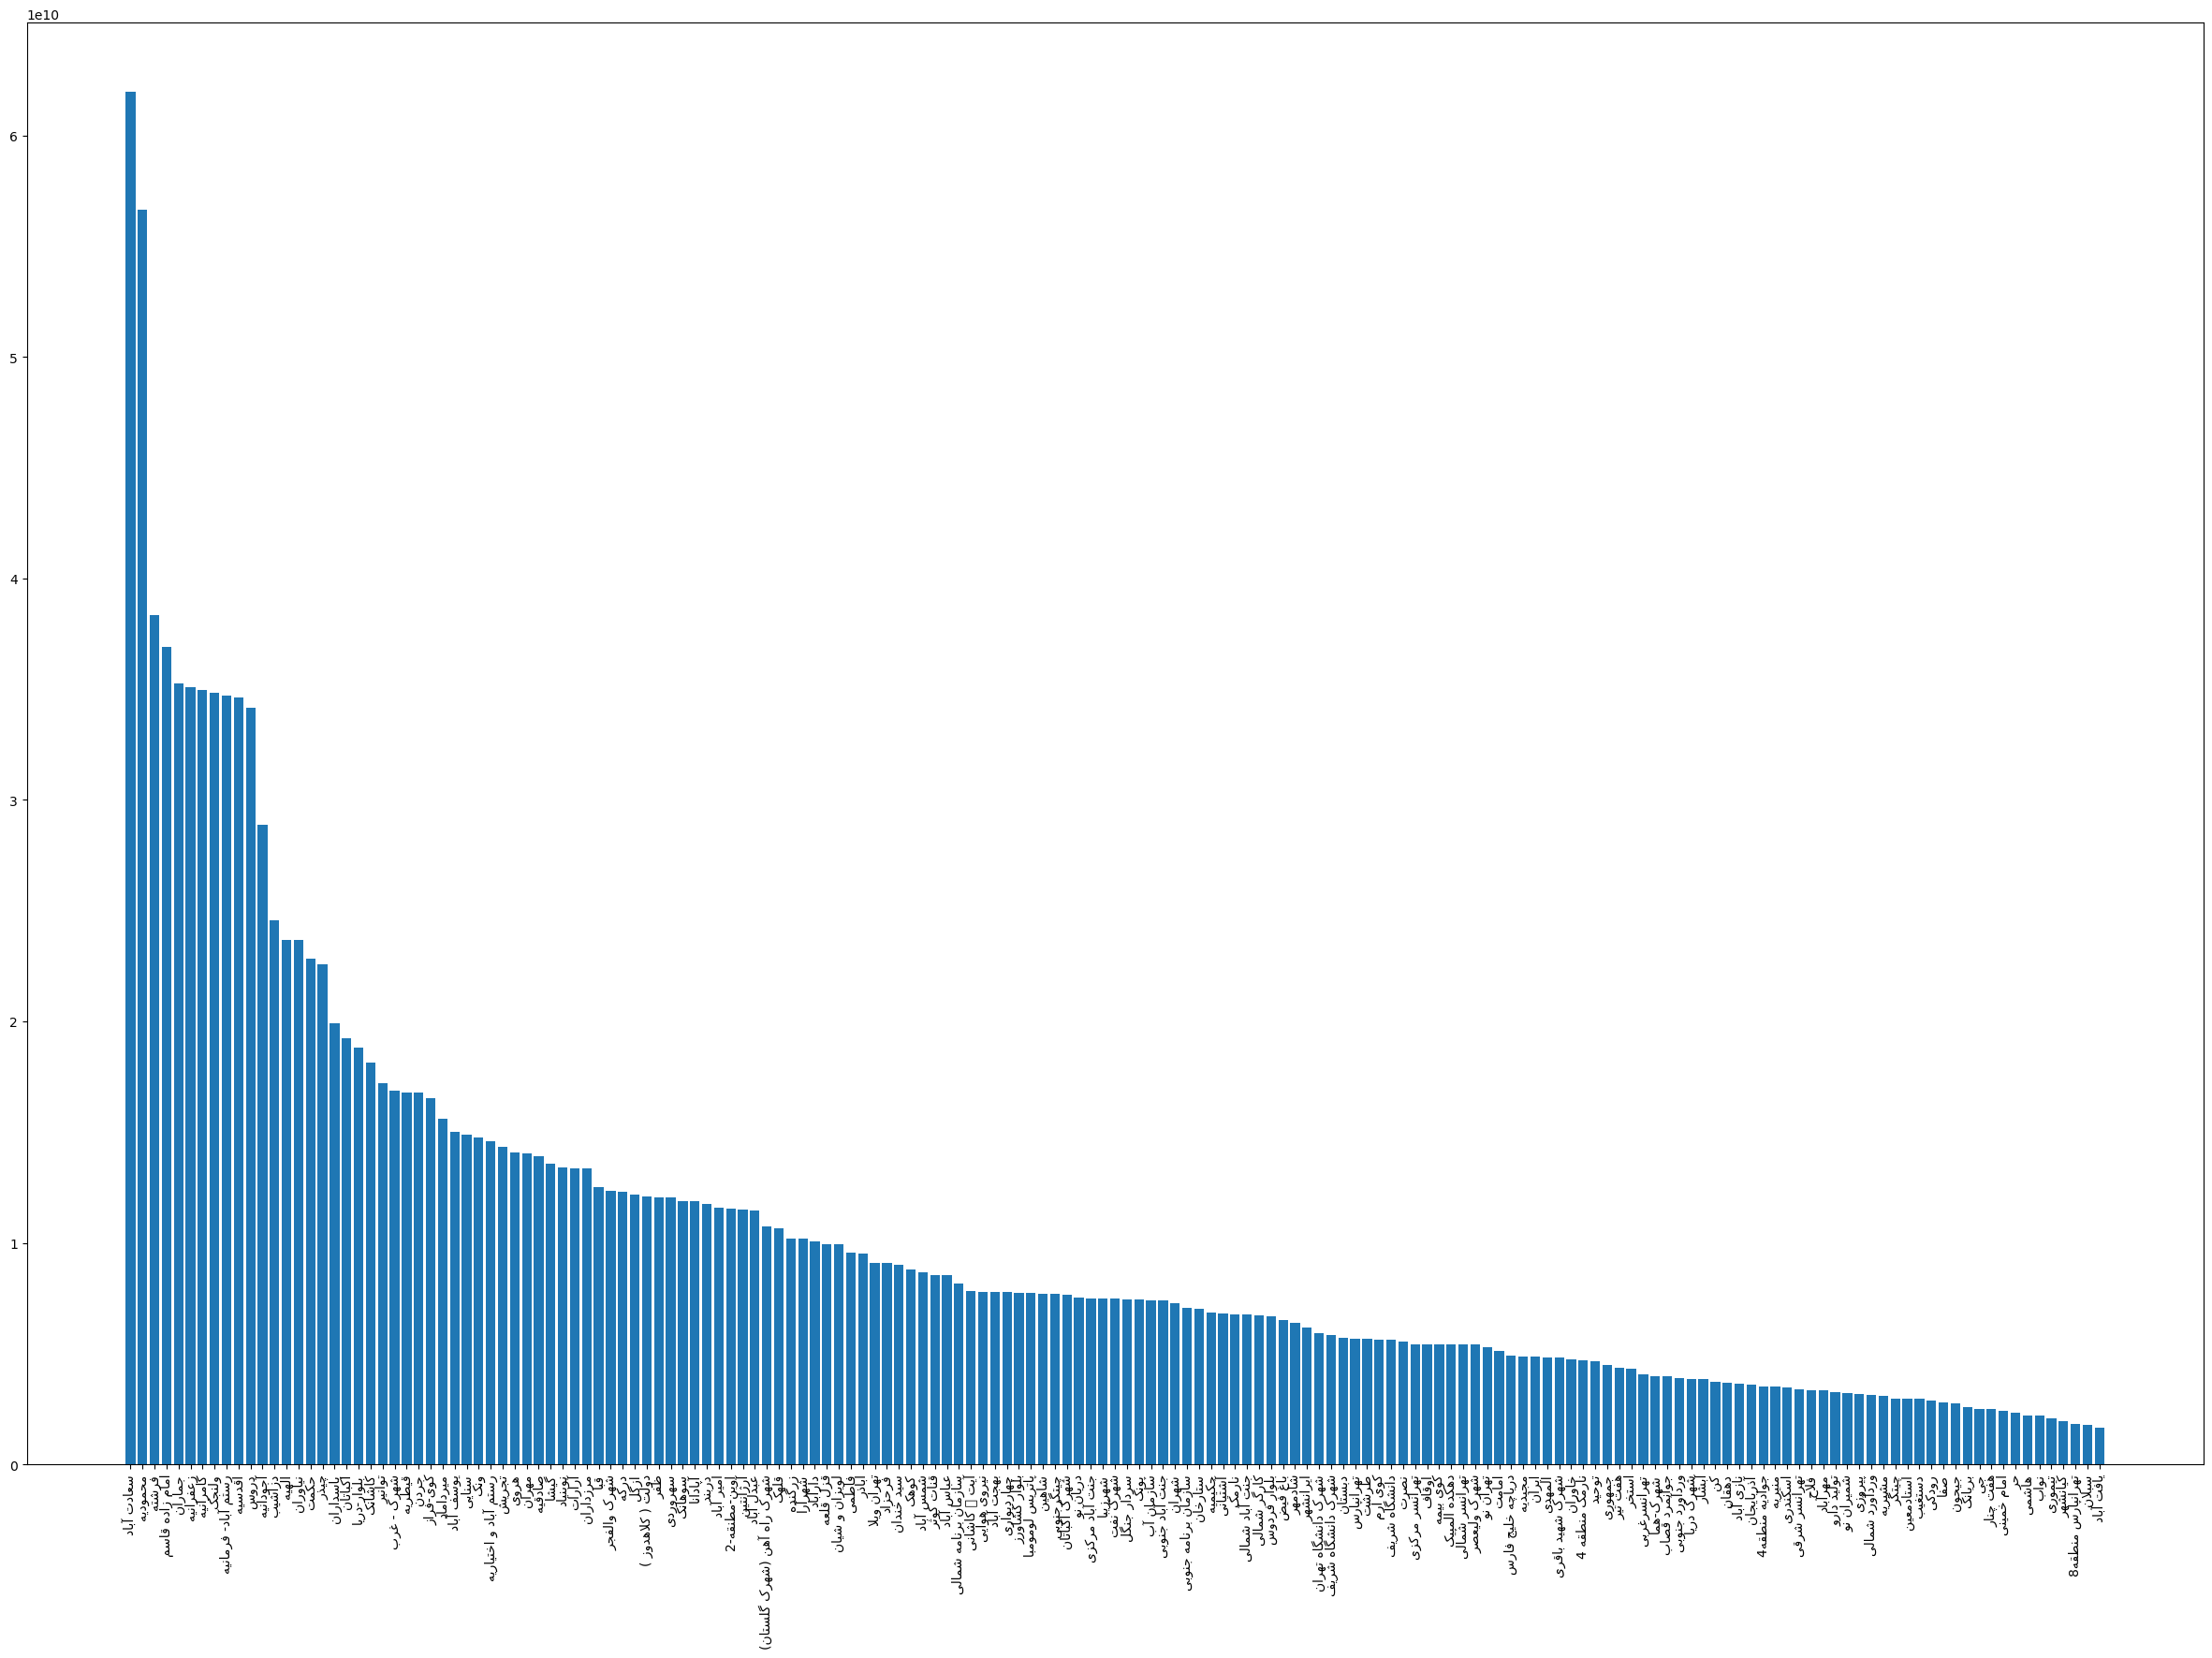

In [18]:
plt.figure(figsize=(30,20))
plt.bar(mean_prices['neighbourhood'].apply(lambda x: get_display(reshape(x))), mean_prices['price'])
plt.xticks(rotation=90)
plt.show()

In [19]:
neghberdict = {mean_prices.neighbourhood[i]:i for i in range(len(mean_prices.neighbourhood))}
neghberdict


{'سعادت آباد': 0,
 'محمودیه': 1,
 'فرشته': 2,
 'امام زاده قاسم': 3,
 'جماران': 4,
 'زعفرانیه': 5,
 'کامرانیه': 6,
 'ولنجک': 7,
 'رستم آباد- فرمانیه': 8,
 'اقدسیه': 9,
 'دروس': 10,
 'آجودانیه': 11,
 'دزاشیب': 12,
 'الهیه': 13,
 'نیاوران': 14,
 'حکمت': 15,
 'چیذر': 16,
 'پاسداران': 17,
 'اکباتان': 18,
 'بلوار-دریا': 19,
 'کاشانک': 20,
 'توانیر': 21,
 'شهرک - غرب': 22,
 'قیطریه': 23,
 'جردن': 24,
 'کوی-فراز': 25,
 'میرداماد': 26,
 'یوسف آباد': 27,
 'سنایی': 28,
 'ونک': 29,
 'رستم آباد و اختیاریه': 30,
 'تجریش': 31,
 'هروی': 32,
 'مهران': 33,
 'صادقیه': 34,
 'گیشا': 35,
 'نوبنیاد': 36,
 'آرارات': 37,
 'مرزداران': 38,
 'قبا': 39,
 'شهرک والفجر': 40,
 'درکه': 41,
 'ازگل': 42,
 'دولت ( کلاهدوز )': 43,
 'ظفر': 44,
 'سهروردی': 45,
 'سوهانک': 46,
 'آپادانا': 47,
 'دربند': 48,
 'امیر آباد': 49,
 'اوین-مطنقه-2': 50,
 'آرژانتین': 51,
 'عبدل آباد': 52,
 'شهرک راه آهن (شهرک گلستان)': 53,
 'قلهک': 54,
 'زرگنده': 55,
 'شهرآرا': 56,
 'دارآباد': 57,
 'قزل قلعه': 58,
 'لویزان و شیان': 59,
 'فاطمی': 60,
 '

In [20]:
df['neighbourhood'] = df['neighbourhood'].apply(lambda x: neghberdict[x])

In [21]:
df

,price,bedrooms,area,neighbourhood,latitude,longitude,elevator,storeHouse,balcony,janitor,...,sauna,pool,jacuzzi,toiletI,toiletF,lighting,fountain,gym,alachiq,age
0,7.950000e+09,2.0,97.0,86,35.747696,51.303749,1,1,1,1,...,0,0,0,0,0,0,0,0,0,7.0
5,9.000000e+09,2.0,94.0,61,35.734413,51.326739,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3.0
6,7.400000e+09,2.0,79.0,95,35.727597,51.304541,1,1,1,1,...,0,0,0,0,0,0,0,0,0,20.0
8,4.000000e+09,1.0,66.0,127,35.748464,51.332910,1,1,0,0,...,0,0,0,0,0,0,0,0,0,17.0
9,4.000000e+09,1.0,60.0,81,35.747522,51.290531,0,1,1,0,...,0,0,0,0,0,0,0,0,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7177,2.850000e+10,3.0,210.0,6,35.806355,51.462246,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12.0
7178,7.000000e+09,2.0,110.0,102,35.738638,51.521351,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
7179,6.300000e+09,2.0,101.0,33,35.751439,51.452583,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.0
7180,3.450000e+10,3.0,152.0,5,35.817373,51.396777,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0


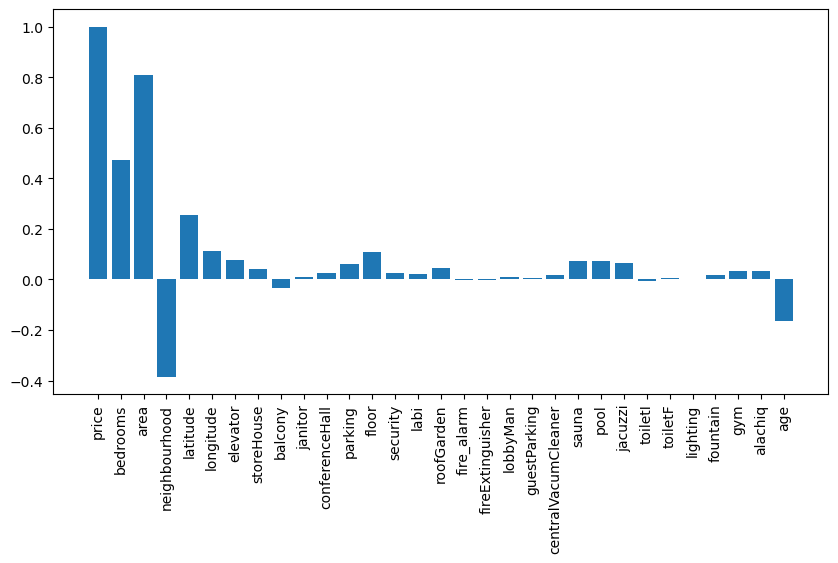

In [22]:
corr = df.corr()['price']
plt.figure(figsize=(10,5))
plt.bar(corr.index,corr.values)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

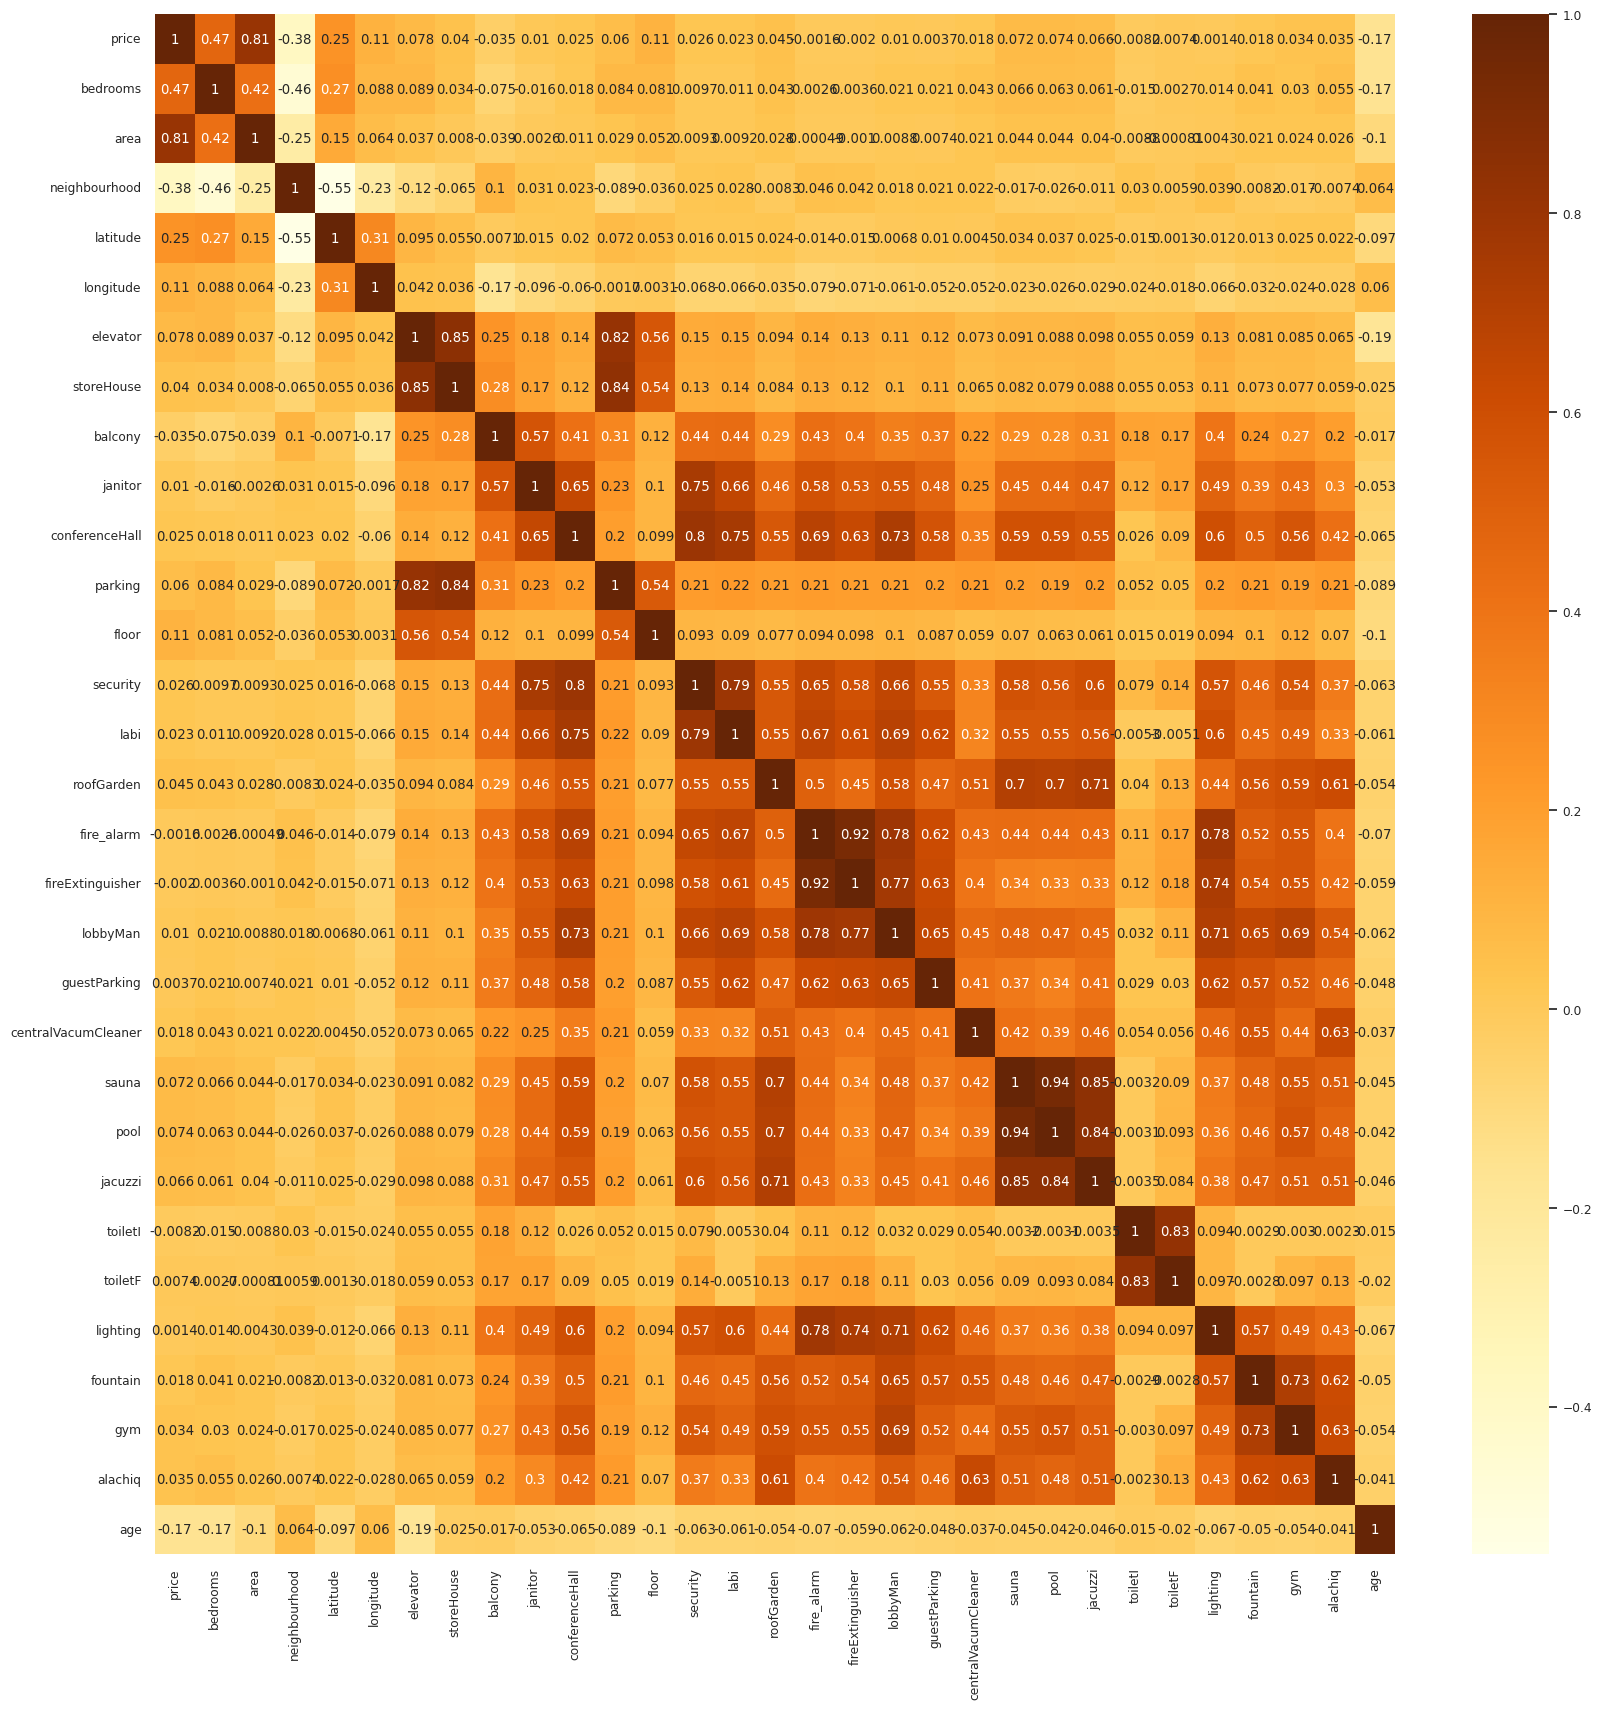

In [23]:
plt.figure(figsize=(20,20))

sns.set(font_scale=0.8,)
sns.heatmap(df.corr(),annot=True,cmap='YlOrBr',

In [25]:
df = df[df.price < df.price.quantile(0.99)]

In [26]:
price_bin = pd.cut(df['price'],10)

X = df.drop(['price'],axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42, stratify=price_bin)

In [27]:
model = LinearRegression()

In [28]:
cv = cross_validate(model,X,y,cv=8,n_jobs=1,scoring=['neg_mean_absolute_error', 'r2'])


In [29]:
print('Mean MAE:', cv['test_neg_mean_absolute_error'].mean()*-1)
print('Mean R2:',cv['test_r2'].mean())

Mean MAE: 3046252026.7252707
Mean R2: 0.7525583870027881


In [30]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [ ]:
print("MAE", mean_absolute_error(y_test,y_pred))

In [ ]:
plt.figure(figsize=(10,6))

ax1 = plt.subplot(212)
ax1.hist((y_pred-y_test)/1e10,bins=100, color='green',label='y_pred - y_test')
ax1.legend()

ax2 = plt.subplot(221)
ax2.hist(y_test/1e10,bins=100,label='y_test')
ax2.legend()

ax3 = plt.subplot(222)
ax3.hist(y_pred/1e10,bins=100,label='y_pred')
ax3.legend()

plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values/1e9,label="True")
plt.plot(y_pred/1e9,label="Predicted")
plt.legend()
plt.show()

In [ ]:
sns.regplot(x= y_test,y = y_pred ,order=1, ci=95, scatter_kws={'color':'g', 's':1})
sns.regplot(x= [0,y_pred.max()],y = [0,y_pred.max()] ,order=1, ci=95,color='orange',line_kws={'linestyle':'--'})
# plt.show()

In [ ]:
test_scores = []
alph_range =np.arange(0,50, 0.1)

for alpha in alph_range:
    cv = cross_validate(Ridge(alpha),X,y,cv=8,n_jobs=-1,scoring='neg_mean_absolute_error')
    test_scores.append(cv['test_score'].mean())

In [ ]:
plt.plot(alph_range,np.array(test_scores)*-1)